## Solution de référence
***
<br>

# ITSMO > Analyse des signaux

## Autocorrélation
L'autocorrélation d'un signal représente le niveau de similitude qui existe entre différentes parties de ce signal, décalées dans le temps. Elle permet en particulier de juger si un signal est aléatoire (aucune similitude quelles que soient les parties observées), et de détecter des motifs plus ou moins réguliers dans un signal quasi-périodique (forte similitude à intervalles réguliers).

Définition de la fonction d'autocorrélation (centrée) de $X$ : $\phi_{XX}(\tau) = E([X(t)-\mu]\cdot[X(t-\tau)-\mu])$.
<br>Estimation pour un signal discret $x(k)$ de longueur N : $c_{XX}(\theta) = \frac{1}{N-\theta} \sum_{k=0}^{N-1} [x(k)-m] \cdot [x(k-\theta)-m]$.

### Autocorrélation d'un signal aléatoire (simulation)
Soit un signal aléatoire contenant mille valeurs, générées numériquement selon une loi de probabilité normale de moyenne nulle et de variance égale à un. On considère arbitrairement ce signal comme étant échantillonné avec une période de $Te = 1 s$.
> Exécutez le code ci-dessous.

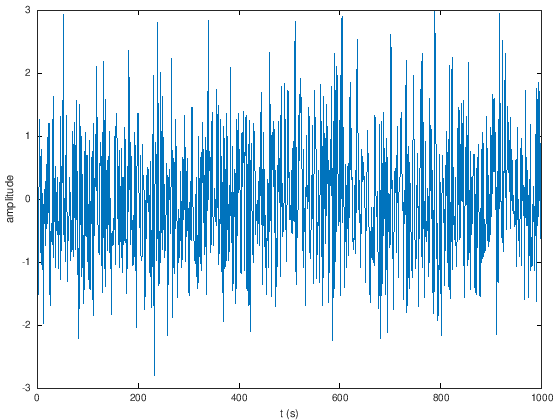

In [1]:
% Génération des données aléatoires (distribution normale)
t = 0:1:999;
y = randn(1000,1);

% Tracé
plot(t,y)
xlabel('t (s)');
ylabel('amplitude')

L'autocorrélation d'un signal parfaitement aléatoire est nulle, sauf pour $\tau=0$ où elle est égale à la variance du signal.
> Écrivez puis exécutez le code permettant de calculer et de tracer l'autocorrélation du $y$, en utilisant la fonction `xcov`.

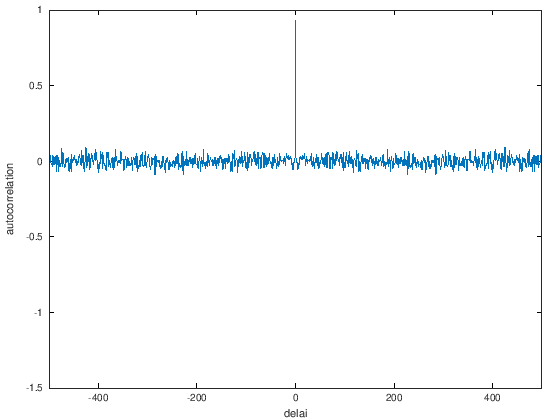

In [2]:
% Calcul de l'autocorrélation
[c,lags] = xcov(y,'unbiased');

% Tracé
plot(lags,c)
xlim([-500, 500])
xlabel('delai');
ylabel('autocorrelation')

### Autocorrélation d'un signal déterministe (simulation)
Soit un signal déterministe contenant mille valeurs, générées numériquement selon une fonction arbitrairement choisie sur le même intervalle de temps et avec la même période d'échantillonnage que eux du signal précédent.
> Exécutez le code ci-dessous.

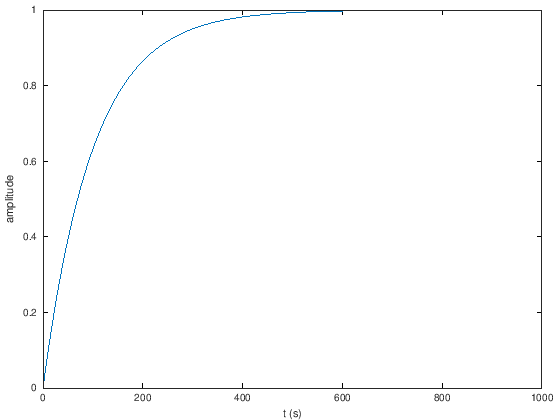

In [3]:
% Génération de données déterministes (comportement asymptotique)
y = 1-exp(-t/100);

% Tracé
plot(t,y)
xlabel('t (s)');
ylabel('amplitude')

L'autocorrélation d'un signal déterministe est non-nulle, et sa valeur pour $\tau=0$ est toujours égale à la variance du signal.
> Écrivez puis exécutez le code permettant de calculer et de tracer l'autocorrélation du $y$, en utilisant la fonction `xcov`.

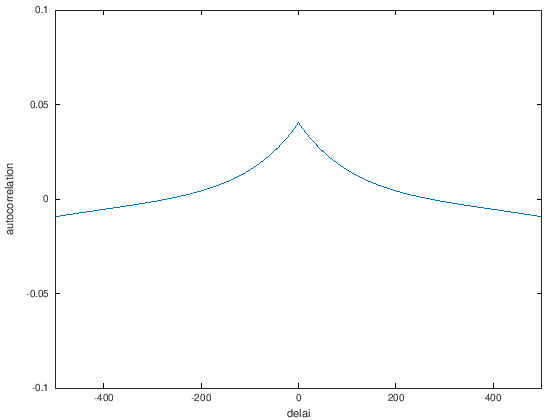

In [4]:
% Calcul de l'autocorrélation
[c,lags] = xcov(y,'unbiased');

% Tracé
plot(lags,c)
xlim([-500, 500])
xlabel('delai');
ylabel('autocorrelation')

### Autocorrélation d'un signal périodique (simulation)
Soit un signal périodique (et donc déterministe) contenant mille valeurs, générées numériquement selon une fonction sinusoïdale sur le même intervalle de temps et avec la même période d'échantillonnage que ceux du signal précédent.
> Exécutez le code ci-dessous.

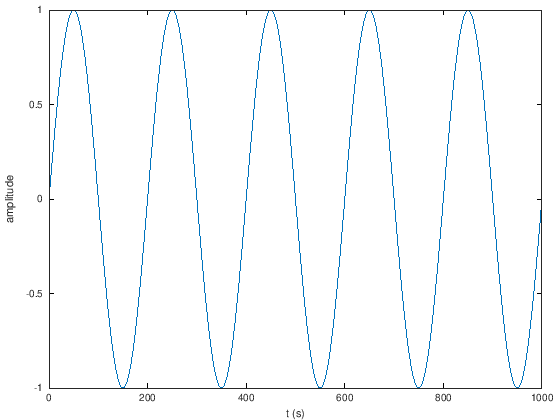

In [5]:
% Génération des données périodiques (sinusoïde)
y =sin(2*pi*t/200);

% Tracé
plot(t,y)
xlabel('t (s)');
ylabel('amplitude')

L'autocorrélation d'un signal parfaitement périodique est non-nulle, périodique avec la même période, et sa valeur pour $\tau=0$ est toujours égale à la variance du signal.
> Écrivez puis exécutez le code permettant de calculer et de tracer l'autocorrélation du y, en utilisant la fonction `xcov`.

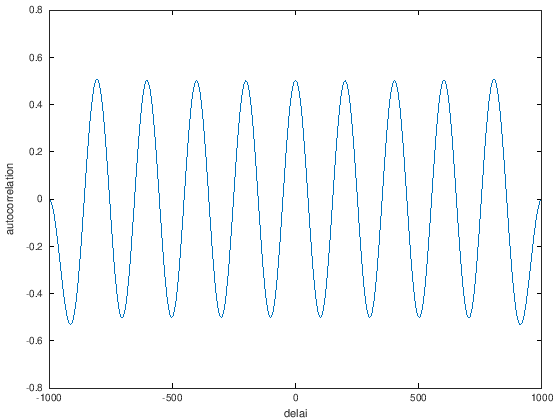

In [6]:
% Calcul de l'autocorrélation
[c,lags] = xcov(y,'unbiased');

% Tracé
plot(lags,c)
xlabel('delai');
ylabel('autocorrelation')

### Autocorrélation d'un signal réel mesuré n°1
Soit un signal de mesure de température $Tx$ (salle de travaux pratiques ENSCBP) échantillonné à la fréquence $\nu e = 1 Hz$ et enregistré dans un fichier de données.
> Exécutez le code ci-dessous.

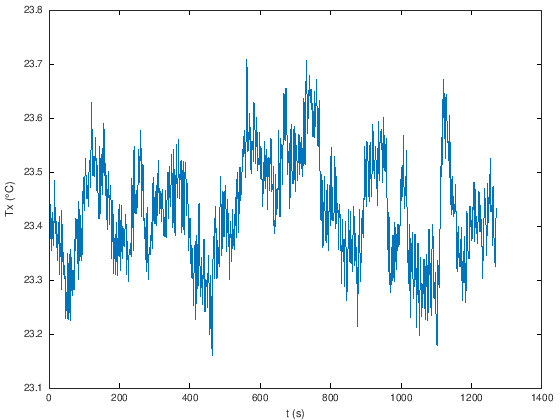

In [7]:
% Chargement du signal mesuré (enregistré à la fréquence de 1 Hz dans le fichier "Tx.mat")
load('data/Tx.mat');
N = length(Tx);

% Tracé
plot(t,Tx)
xlabel('t (s)');
ylabel('Tx (\degC)')

Le signal $Tx$ peut être partiellement déterministe, partiellement périodique, partiellement aléatoire, et son autocorrélation peut donc présenter des caractéristiques proches (et mêlées) de celles des exemples précédents (simulations).
> Écrivez puis exécutez le code permettant de calculer et de tracer l'autocorrélation du $Tx$, en utilisant la fonction `xcov`.

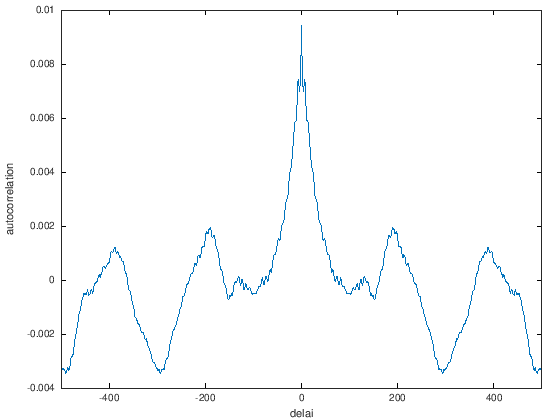

In [8]:
% Calcul de l'autocorrélation
[c,lags] = xcov(Tx,'unbiased');

% Tracé
plot(lags,c)
xlim([-500, 500])
xlabel('delai');
ylabel('autocorrelation')

### Autocorrélation de signaux réels mesurés n°2

Soit des signaux de mesure de vitesse $V$ et de température $T$ (transmis par la sonde Viking1 en 1976 depuis la surface de Mars), échantillonnés à la fréquence $\nu e = 2.78\times 10^{-4} Hz$ (une mesure par heure) et enregistrés dans un fichier de données.
> Exécutez le code ci-dessous.

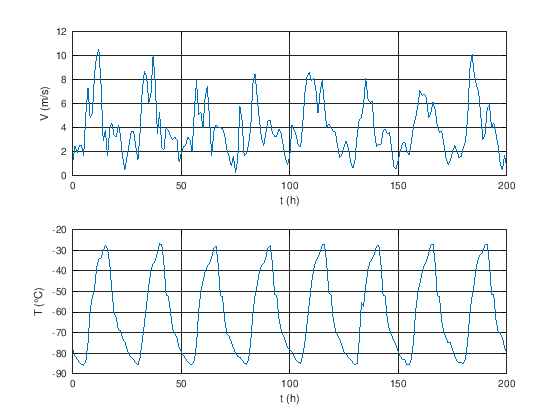

In [9]:
% Chargement des données (enregistrées à la fréquence de 2.78e-4 Hz dans le fichier "viking1.mat")
load('data/viking1.mat');
N = length(V);
t = t/3600; % Convertit le temps en heures pour la représentation graphique

% Tracés
subplot(2,1,1)
plot(t,V)
xlim([0 200]); grid
xlabel('t (h)');
ylabel('V (m/s)')
subplot(2,1,2)
plot(t,T)
xlim([0 200]); grid
xlabel('t (h)');
ylabel('T (\degC)')

Ces signaux peuvent être partiellement déterministes, partiellement aléatoires, et sont nettement quasi-périodiques. Leurs autocorrélations peuvent donc présenter des caractéristiques proches (et mêlées) de celles des exemples précédents (simulations), et doivent mettre en évidence leur quasi-périodicité.
> Écrivez puis exécutez le code permettant de calculer et de tracer les autocorrélations de $V$ et de $T$, en utilisant la fonction `xcov`.

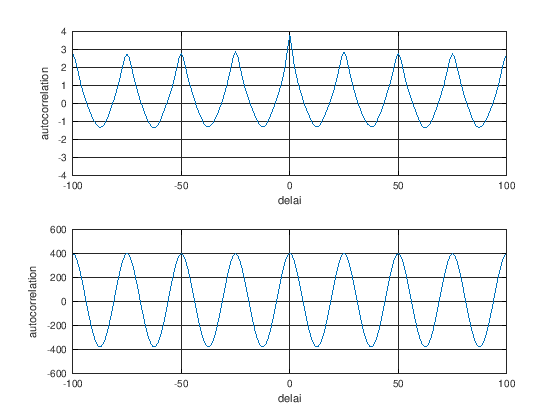

In [10]:
% Calcul des autocorrélations
[cV,lags] = xcov(V,'unbiased');
[cT,lags] = xcov(T,'unbiased');

% Tracé
subplot(2,1,1)
plot(lags,cV)
xlim([-100, 100]); grid
xlabel('delai');
ylabel('autocorrelation')
subplot(2,1,2)
plot(lags,cT)
xlim([-100, 100]); grid
xlabel('delai');
ylabel('autocorrelation')

## Intercorrélation
L'intercorrélation de deux signaux représente le niveau de similitude qui existe entre différentes parties des signaux décalées dans le temps. 

Définition de la fonction d'intercorrélation (centrée) de $X$ et $Y$: $\phi_{XY}(\tau) = E([X(t)-\mu_X]\cdot[Y(t-\tau)-\mu_Y])$.
<br>Estimation pour des signaux discrets $x(k)$ et $y(k)$ de longueur N : $c_{XY}(\theta) = \frac{1}{N-\theta} \sum_{k=0}^{N-1} [x(k)-m_x] \cdot [y(k-\theta)-m_y]$.

### Intercorrélation de signaux réels dépendants
Les signaux de vitesse du vent et de température à la surface Mars ne sont pas indépendants : soit l'un est un effet de l'autre, soit ils sont tous deux les effets d'une autre cause.
<br>$\rightarrow$ leur intercorrélation doit être non-nulle.
> Écrivez puis exécutez le code permettant de calculer et de tracer l'intercorrélation de $V$ et $T$, en utilisant la fonction `xcov`.
><br> Pour faciliter la lecture du graphique, vous pouvez limiter l'affichage des abscisses entre -100 et 100 (par exemple) à l'aide de la fonction `xlim`.

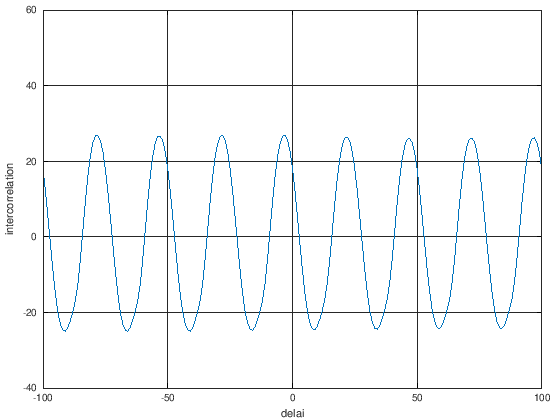

In [11]:
% Calcul de l'intercorrélation
[c,lags] = xcov(V,T,'unbiased');

% Tracé
plot(lags,c)
xlim([-100, 100]); grid
xlabel('delai');
ylabel('intercorrelation')

### Intercorrélation de signaux réels indépendants
Le signal de température mesuré à la surface de Mars en 1976, et le signal de température mesuré sur Terre dans une salle de travaux pratiques de l'ENSCBP en 2006 sont indépendants.
<br>$\rightarrow$ leur intercorrélation doit être nulle.
> Écrivez puis exécutez le code permettant de calculer et de tracer l'intercorrélation de $Tx$ et $T$, en utilisant la fonction `xcov`.
><br> Pour faciliter la lecture du graphique, vous pouvez limiter l'affichage des abscisses entre -100 et 100 (par exemple) à l'aide de la fonction `xlim`.

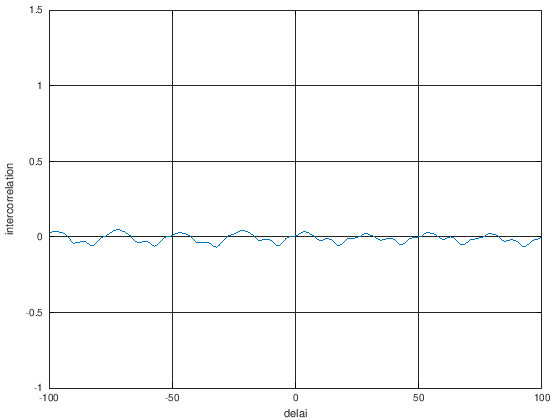

In [12]:
% Calcul de l'intercorrélation
[c,lags] = xcov(Tx,T,'unbiased');

% Tracé
plot(lags,c)
xlim([-100, 100]); grid
xlabel('delai');
ylabel('intercorrelation')